In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline

In [6]:
salary  = pd.read_csv(r'C:\Users\abhay\Downloads\SalaryData.csv')
salary.head()

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935
3   Doctorate   Adm-clerical  220754
4   Doctorate          Sales  170769

In [8]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
Education     40 non-null object
Occupation    40 non-null object
Salary        40 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.0+ KB


In [10]:
salary.isnull().sum()

Education     0
Occupation    0
Salary        0
dtype: int64

In [11]:
salary.describe()

Salary
count      40.000000
mean   162186.875000
std     64860.407506
min     50103.000000
25%     99897.500000
50%    169100.000000
75%    214440.750000
max    260151.000000

# 1.1 State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

Ans:- 
for variable Education:-
Ho = Mean salary of people with Doctorate = Mean salary of people with Bachelors = Mean Salary of people with HS-grad
Ha = Means salaries are not equal with respect to different education level

For Variable Occupation:-
Ho = Mean salary of Adm-clerical = Mean salary of Exec-managerial = Mean Salary of Prof-specialty = Mean Salary of Sales
Ha = Means salaries are not equal with respect to different Occupation

In [12]:
#converting object variables to categorical
salary.Education = pd.Categorical(salary.Education )
salary.Occupation = pd.Categorical(salary.Occupation)

In [13]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
Education     40 non-null category
Occupation    40 non-null category
Salary        40 non-null int64
dtypes: category(2), int64(1)
memory usage: 776.0 bytes


# 1.2 Perform one-way ANOVA for Education with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [18]:
formula = 'Salary ~ C(Education)'
model = ols(formula, salary).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


Based on one way ANOVA result above PR(>F) = 1.257709e-08.this indicate 'p' value is less than the significance level of 0.05.
We can reject the null hypothesis and states that 'at least one of the three means' are not equal. We can conclude that the
different Education level have significant effect over Salary.

# 1.3 Perform one-way ANOVA for variable Occupation with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [15]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, salary).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


Based on one way ANOVA result above PR(>F) = 0.458508.this indicate 'p' value is more than the significance level of 0.05. We fail to reject the null hypothesis and states that mean of salaries across different Occupation is equal. We can conclude that the different Occupation does not have significant effect on Salary.

# 1.5 What is the interaction between the two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.

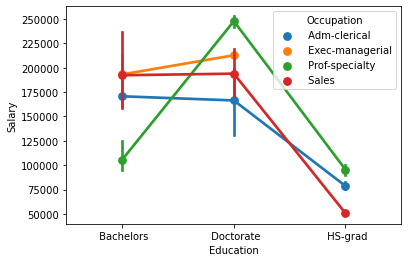

In [20]:
sns.pointplot(x='Education', y='Salary',hue='Occupation',data=salary)

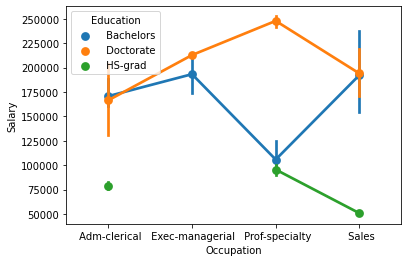

In [21]:
sns.pointplot(x='Occupation', y='Salary',hue='Education', data=salary)

# 1.6 Perform a two-way ANOVA based on the Education and Occupation (along with their interaction Education*Occupation) with the variable ‘Salary’. State the null and alternative hypotheses and state your results. How will you interpret this result?

Ho = There is no interaction
Ha = There is interaction

In [22]:
model=ols('Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)',data=salary).fit()
aov_table=anova_lm(model,type=2)
print(aov_table)

                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  


In [27]:
edu  = pd.read_csv(r'C:\Users\abhay\Downloads\Education+-+Post+12th+Standard (1).csv')
#checking top 5 rows
edu.head().T

0                   1               2  \
Names        Abilene Christian University  Adelphi University  Adrian College   
Apps                                 1660                2186            1428   
Accept                               1232                1924            1097   
Enroll                                721                 512             336   
Top10perc                              23                  16              22   
Top25perc                              52                  29              50   
F.Undergrad                          2885                2683            1036   
P.Undergrad                           537                1227              99   
Outstate                             7440               12280           11250   
Room.Board                           3300                6450            3750   
Books                                 450                 750             400   
Personal                             2200                1500            1165   
PhD                                    70                  29              53   
Terminal                               78                  30              66   
S.F.Ratio                            18.1                12.2            12.9   
perc.alumni                            12                  16              30   
Expend                               7041               10527            8735   
Grad.Rate                              60                  56              54   

                               3                          4  
Names        Agnes Scott College  Alaska Pacific University  
Apps                         417                        193  
Accept                       349                        146  
Enroll                       137                         55  
Top10perc                     60                         16  
Top25perc                     89                         44  
F.Undergrad                  510                        249  
P.Undergrad                   63                        869  
Outstate                   12960                       7560  
Room.Board                  5450                       4120  
Books                        450                        800  
Personal                     875                       1500  
PhD                           92                         76  
Terminal                      97                         72  
S.F.Ratio                    7.7                       11.9  
perc.alumni                   37                          2  
Expend                     19016                      10922  
Grad.Rate                     59                         15

In [28]:
#checking last 5 rows
edu.tail()

Names   Apps  Accept  Enroll  Top10perc  \
772         Worcester State College   2197    1515     543          4   
773               Xavier University   1959    1805     695         24   
774  Xavier University of Louisiana   2097    1915     695         34   
775                 Yale University  10705    2453    1317         95   
776    York College of Pennsylvania   2989    1855     691         28   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
772         26         3089         2029      6797        3900    500   
773         47         2849         1107     11520        4960    600   
774         61         2793          166      6900        4200    617   
775         99         5217           83     19840        6510    630   
776         63         2988         1726      4990        3560    500   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
772      1200   60        60       21.0           14    4469         40  
773      1250   73        75       13.3           31    9189         83  
774       781   67        75       14.4           20    8323         49  
775      2115   96        96        5.8           49   40386         99  
776      1250   75        75       18.1           28    4509         99

# Univariate Analysis

In [29]:
#checking number of rows and columns
print("no. of rows: ",edu.shape[0], "\n""no. of columns: ",edu.shape[1])

no. of rows:  777 
no. of columns:  18


In [30]:
#checking for data details along with its data type
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
Names          777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 109.3+ KB


In [34]:
#describing data
edu.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

In [33]:
#checking for missing data
edu.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [35]:
#checking for duplidate data
edu.duplicated().sum()

0

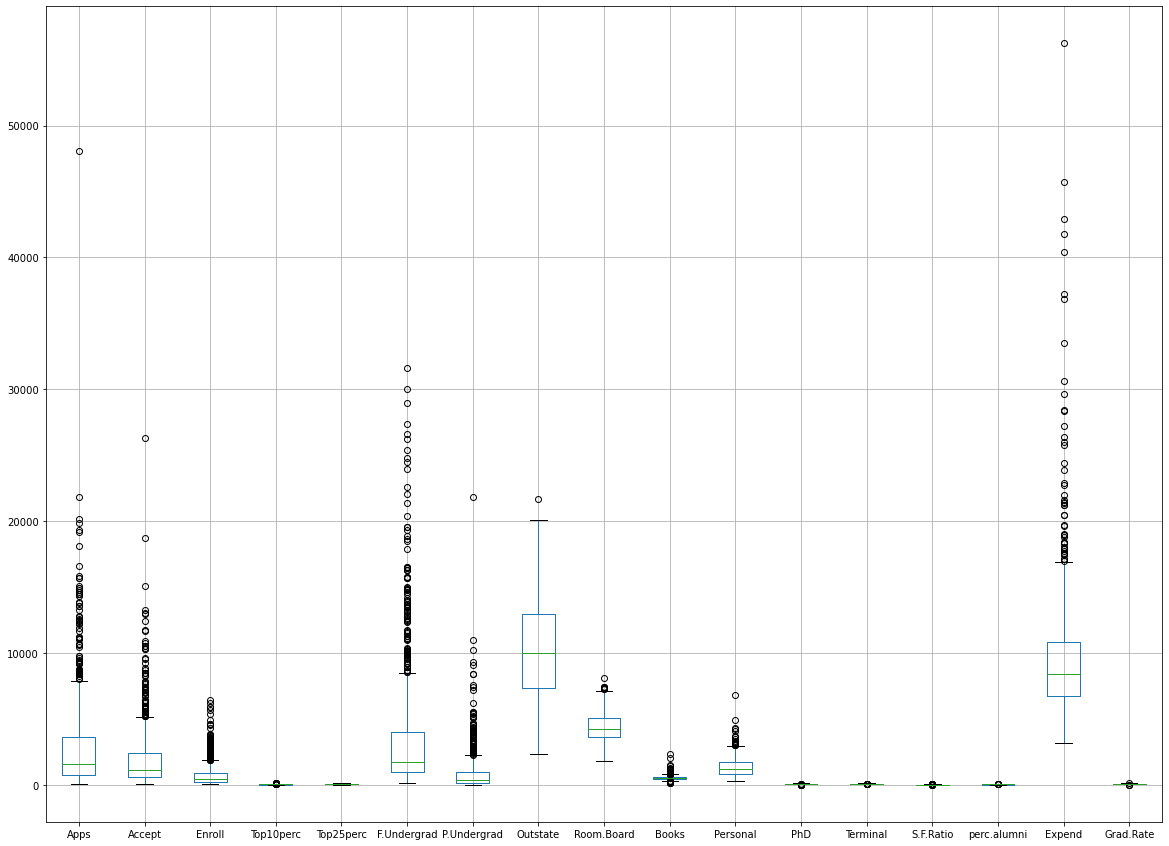

In [36]:
#checking for outliers
edu.boxplot(figsize=(20,15))

C:\Users\abhay\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\abhay\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\abhay\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\abhay\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDepreca

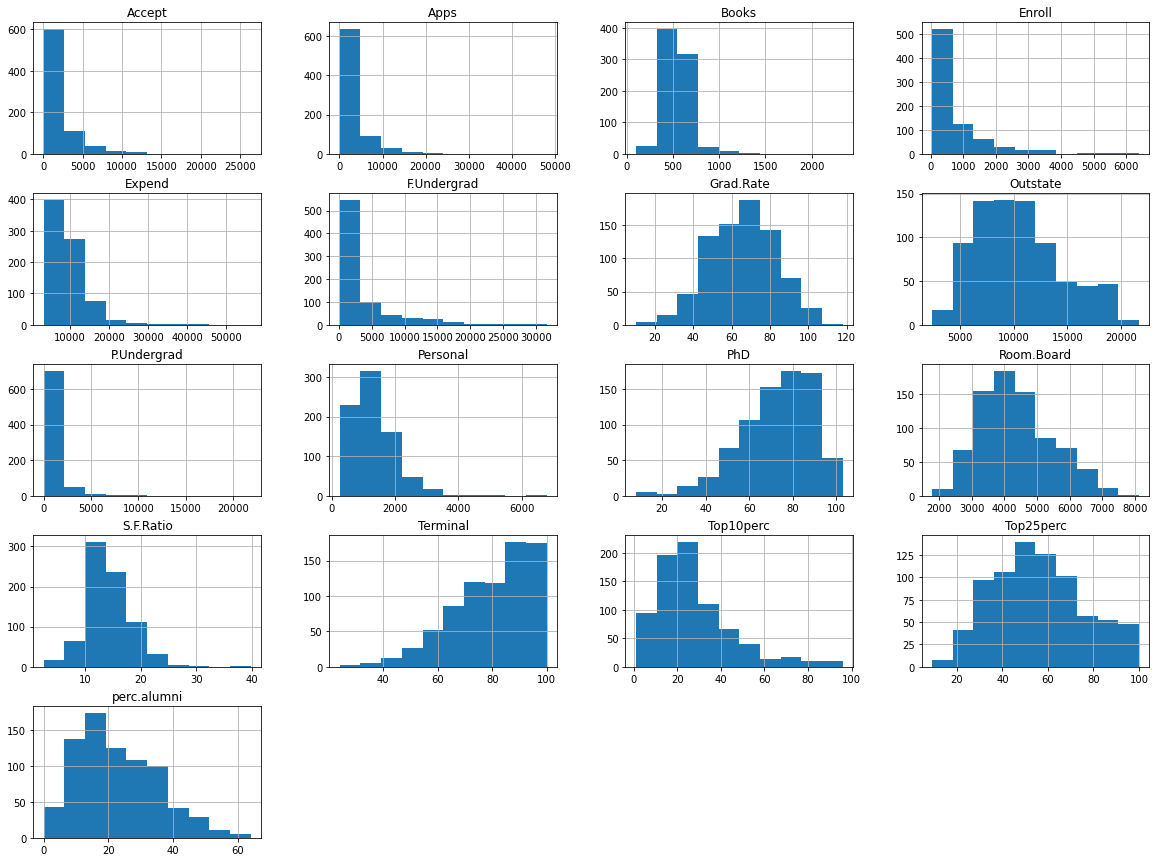

In [37]:
#checking skewness of data
edu.hist(figsize=(20,15));

# Bivariate Analysis

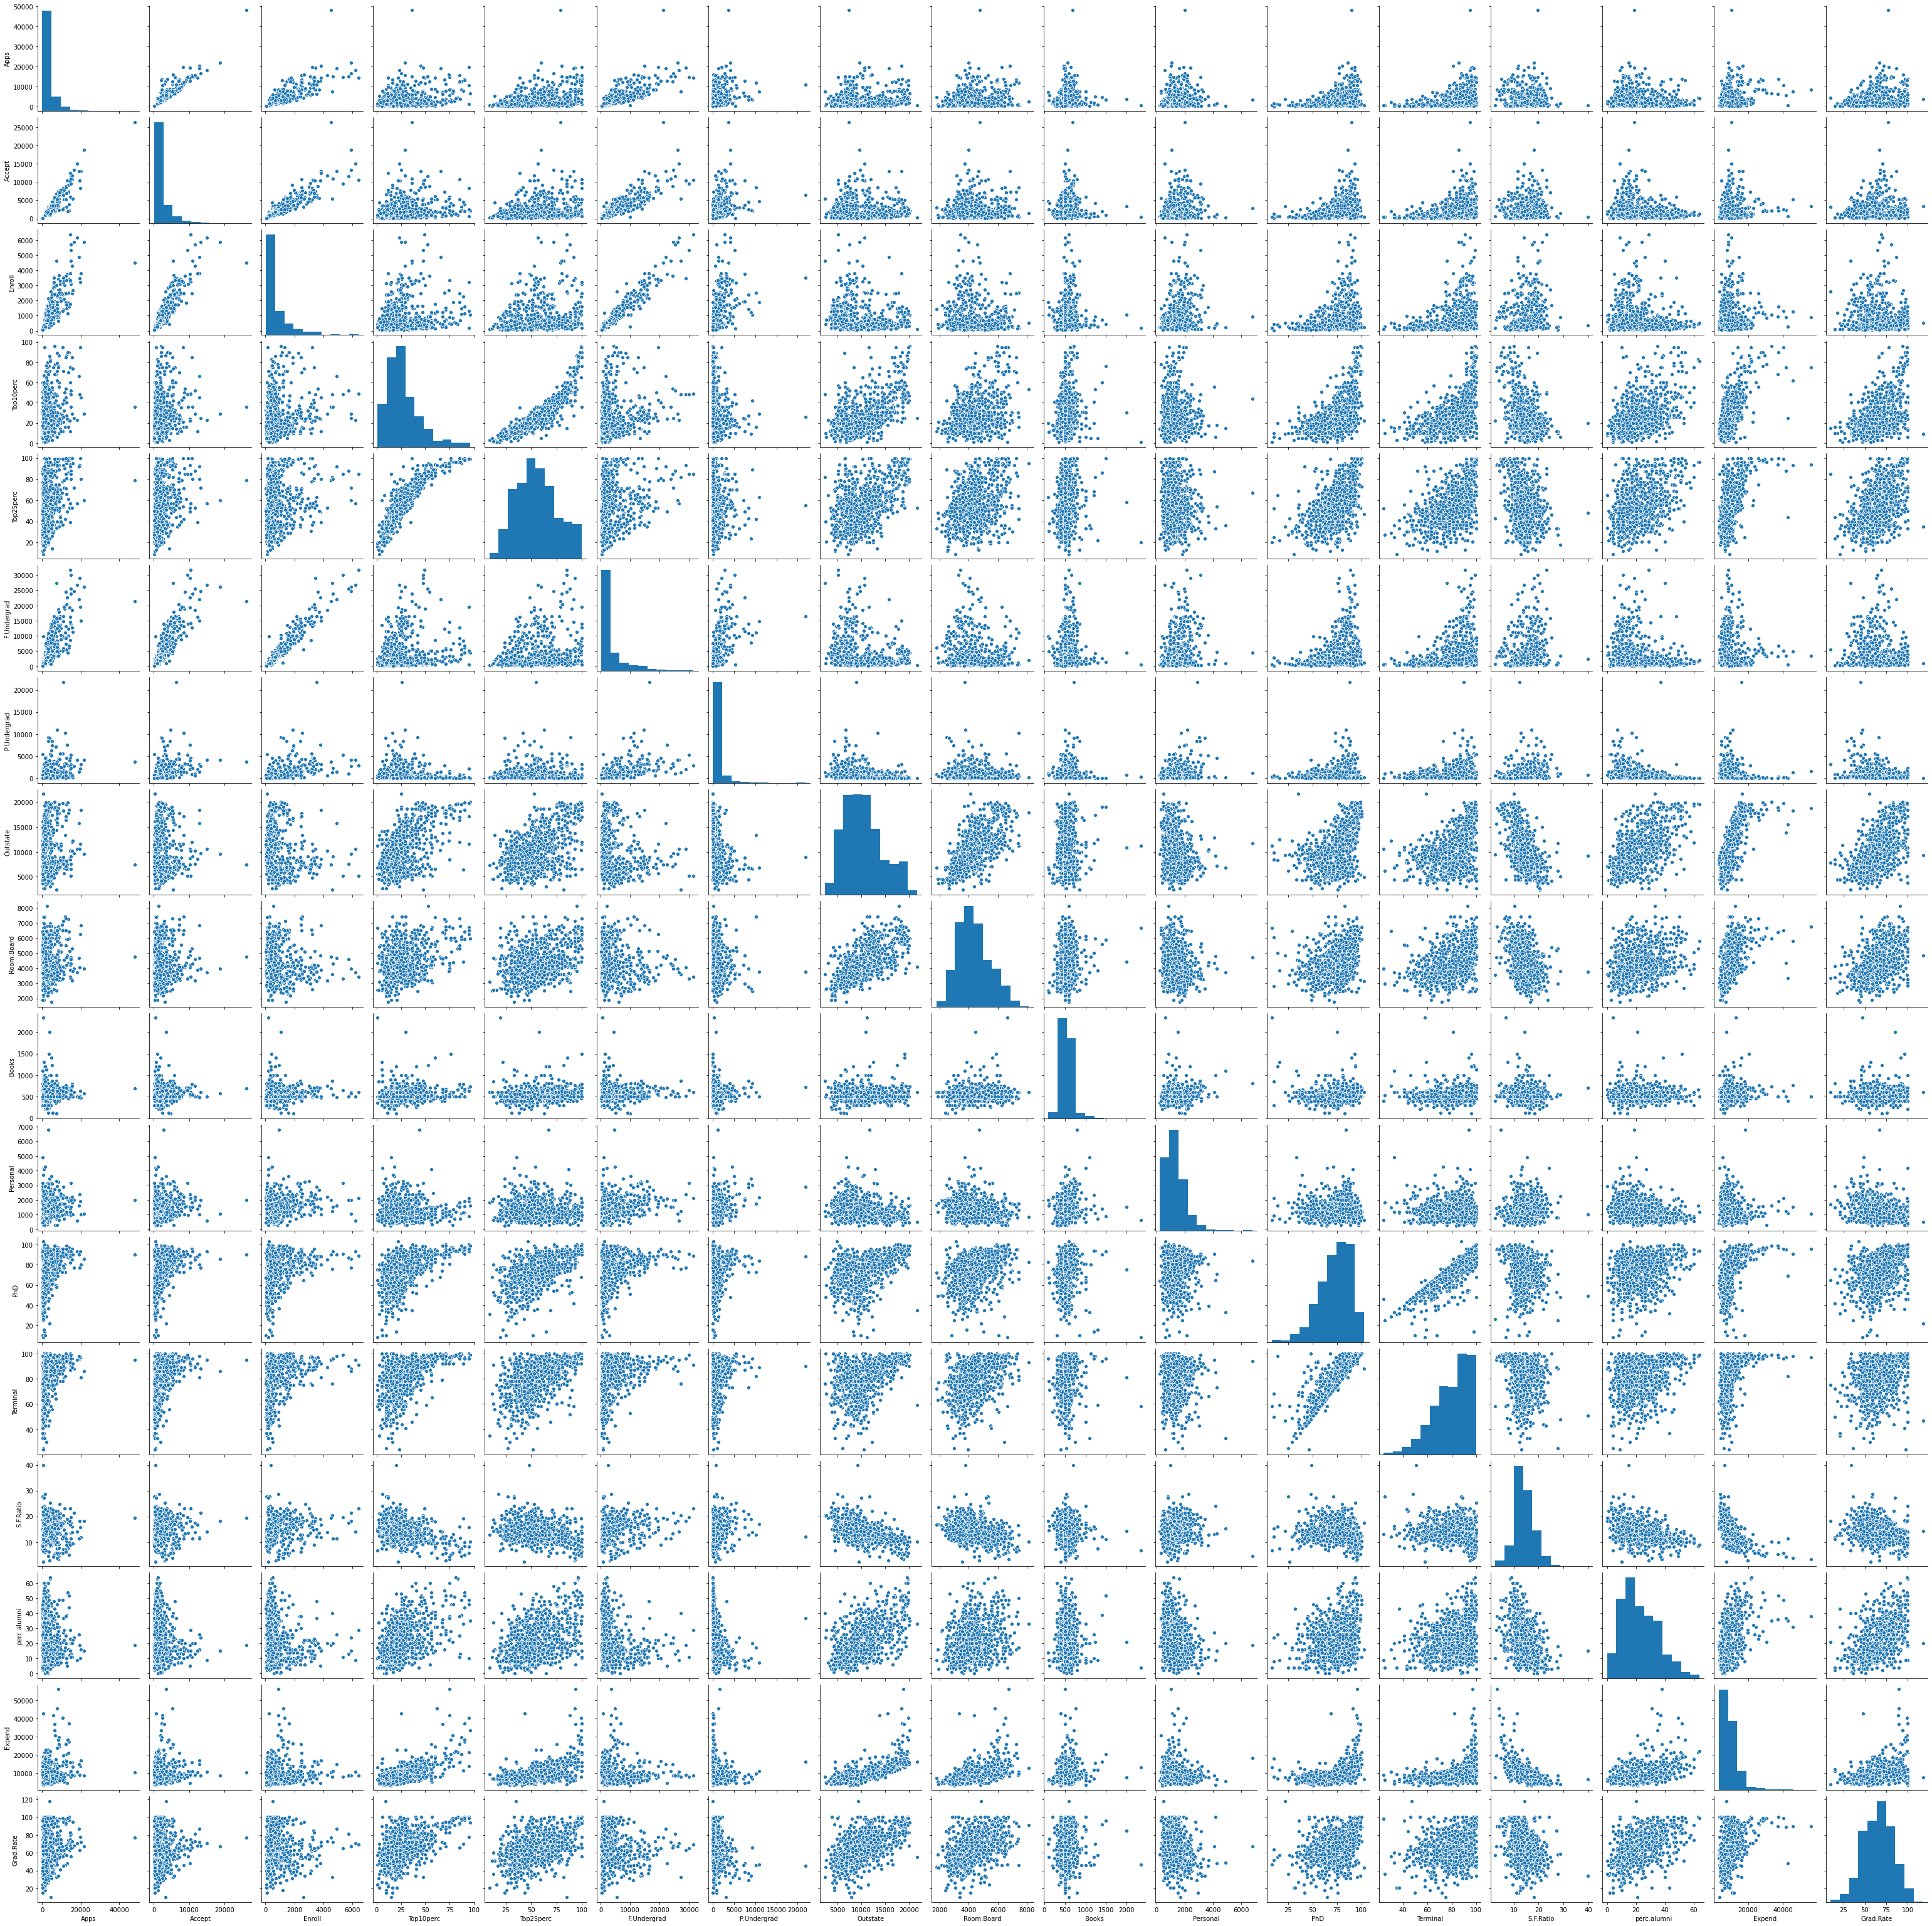

In [43]:
#plot the pair plot:-
sns.pairplot(data = edu)
plt.show()

In [45]:
#checking covariance
edu.cov()

Apps        Accept        Enroll     Top10perc  \
Apps         1.497846e+07  8.949860e+06  3.045256e+06  23132.773138   
Accept       8.949860e+06  6.007960e+06  2.076268e+06   8321.124872   
Enroll       3.045256e+06  2.076268e+06  8.633684e+05   2971.583415   
Top10perc    2.313277e+04  8.321125e+03  2.971583e+03    311.182456   
Top25perc    2.695266e+04  1.201340e+04  4.172592e+03    311.630480   
F.Undergrad  1.528970e+07  1.039358e+07  4.347530e+06  12089.113681   
P.Undergrad  2.346620e+06  1.646670e+06  7.257907e+05  -2829.474981   
Outstate     7.809704e+05 -2.539623e+05 -5.811885e+05  39907.179832   
Room.Board   7.000729e+05  2.443471e+05 -4.099706e+04   7186.705605   
Books        8.470375e+04  4.594281e+04  1.729120e+04    346.177405   
Personal     4.683468e+05  3.335566e+05  1.767380e+05  -1114.551186   
PhD          2.468943e+04  1.423820e+04  5.028961e+03    153.184870   
Terminal     2.105307e+04  1.218209e+04  4.217086e+03    127.551581   
S.F.Ratio    1.465061e+03  1.709838e+03  8.726848e+02    -26.874525   
perc.alumni -4.327122e+03 -4.859487e+03 -2.081694e+03     99.567208   
Expend       5.246171e+06  1.596272e+06  3.113454e+05  60879.310196   
Grad.Rate    9.756422e+03  2.834163e+03 -3.565880e+02    149.992164   

                Top25perc   F.Undergrad   P.Undergrad      Outstate  \
Apps         26952.663479  1.528970e+07  2.346620e+06  7.809704e+05   
Accept       12013.404757  1.039358e+07  1.646670e+06 -2.539623e+05   
Enroll        4172.592435  4.347530e+06  7.257907e+05 -5.811885e+05   
Top10perc      311.630480  1.208911e+04 -2.829475e+03  3.990718e+04   
Top25perc      392.229216  1.915895e+04 -1.615412e+03  3.899243e+04   
F.Undergrad  19158.952782  2.352658e+07  4.212910e+06 -4.209843e+06   
P.Undergrad  -1615.412144  4.212910e+06  2.317799e+06 -1.552704e+06   
Outstate     38992.427500 -4.209843e+06 -1.552704e+06  1.618466e+07   
Room.Board    7199.903568 -3.664582e+05 -1.023919e+05  2.886597e+06   
Books          377.759266  9.253576e+04  2.041045e+04  2.580824e+04   
Personal     -1083.605065  1.041709e+06  3.297324e+05 -8.146737e+05   
PhD            176.518449  2.521178e+04  3.706756e+03  2.515752e+04   
Terminal       153.002612  2.142424e+04  3.180597e+03  2.416415e+04   
S.F.Ratio      -23.097199  5.370209e+03  1.401303e+03 -8.835254e+03   
perc.alumni    102.550946 -1.379193e+04 -5.297337e+03  2.822955e+04   
Expend       54546.483305  4.724040e+05 -6.643512e+05  1.413324e+07   
Grad.Rate      162.371398 -6.563308e+03 -6.721062e+03  3.947968e+04   

               Room.Board         Books      Personal           PhD  \
Apps         7.000729e+05  84703.752639  4.683468e+05  24689.433666   
Accept       2.443471e+05  45942.807867  3.335566e+05  14238.201489   
Enroll      -4.099706e+04  17291.199742  1.767380e+05   5028.961166   
Top10perc    7.186706e+03    346.177405 -1.114551e+03    153.184870   
Top25perc    7.199904e+03    377.759266 -1.083605e+03    176.518449   
F.Undergrad -3.664582e+05  92535.764728  1.041709e+06  25211.784197   
P.Undergrad -1.023919e+05  20410.446674  3.297324e+05   3706.756219   
Outstate     2.886597e+06  25808.242145 -8.146737e+05  25157.515051   
Room.Board   1.202743e+06  23170.313390 -1.480838e+05   5895.034749   
Books        2.317031e+04  27259.779946  2.004303e+04     72.534242   
Personal    -1.480838e+05  20043.025650  4.584258e+05   -120.898783   
PhD          5.895035e+03     72.534242 -1.208988e+02    266.608636   
Terminal     6.047300e+03    242.963918 -3.051542e+02    204.231332   
S.F.Ratio   -1.574206e+03    -20.867207  3.654158e+02     -8.436492   
perc.alumni  3.701431e+03    -82.263132 -2.399311e+03     50.383230   
Expend       2.873308e+06  96912.580326 -3.460978e+05  36898.058233   
Grad.Rate    8.005360e+03      3.008837 -3.132615e+03     85.557109   

                 Terminal     S.F.Ratio   perc.alumni        Expend  \
Apps         21053.067602   1465.060576  -4327.122381  5.246171e+06   
Accept       12182.093828   1709.838189  -

In [46]:
#checking correlation
edu.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

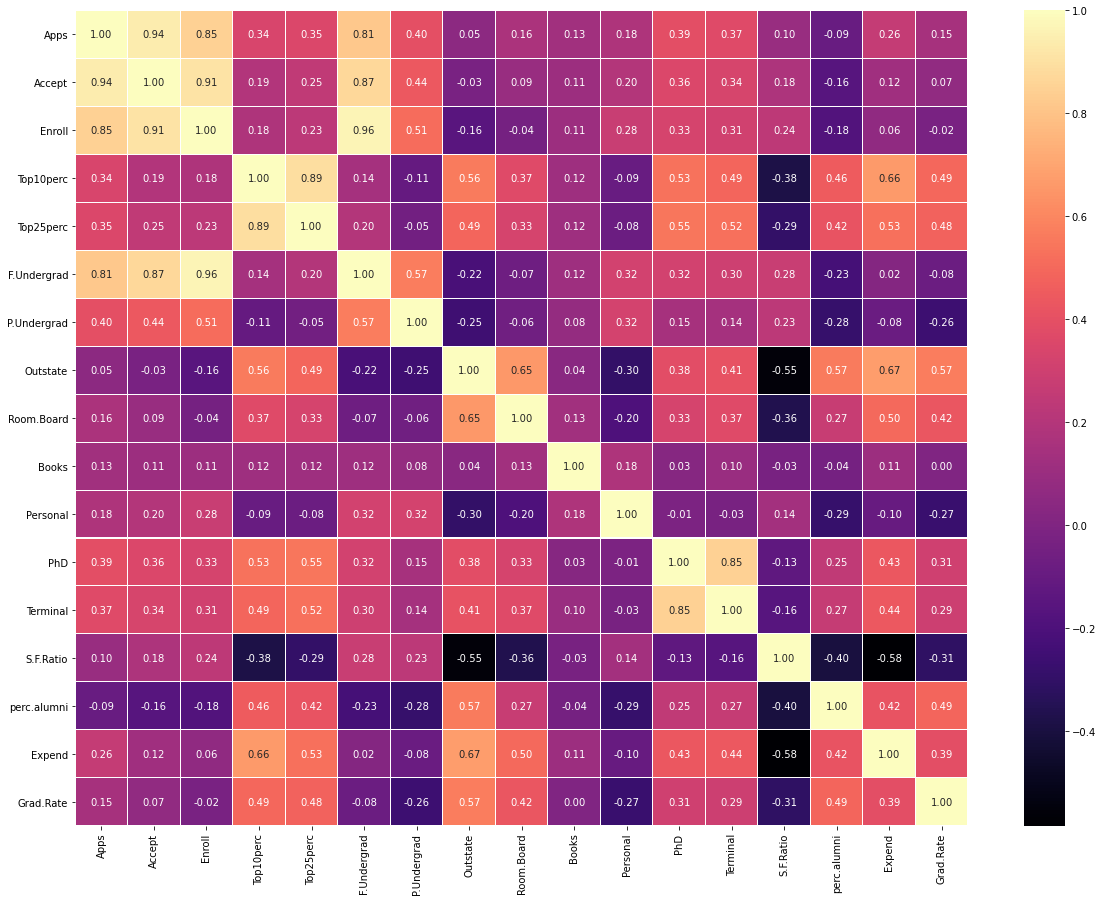

In [48]:
#heat map
fig,ax = plt.subplots(figsize=(20, 15))   
sns.heatmap(edu.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

In [49]:
print(edu.std())

Apps           3870.201484
Accept         2451.113971
Enroll          929.176190
Top10perc        17.640364
Top25perc        19.804778
F.Undergrad    4850.420531
P.Undergrad    1522.431887
Outstate       4023.016484
Room.Board     1096.696416
Books           165.105360
Personal        677.071454
PhD              16.328155
Terminal         14.722359
S.F.Ratio         3.958349
perc.alumni      12.391801
Expend         5221.768440
Grad.Rate        17.177710
dtype: float64


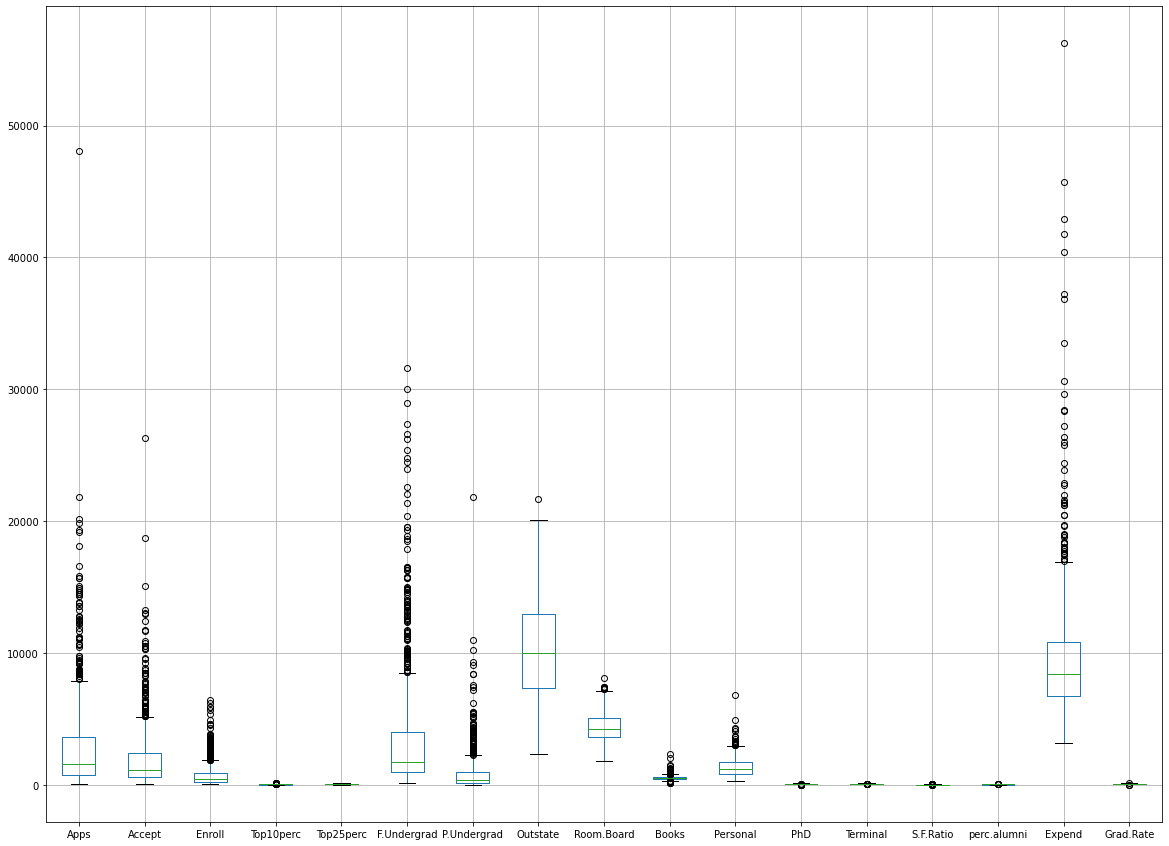

In [50]:
edu.boxplot(figsize=(20,15))

In [51]:
#treating outlier
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   

In [84]:
lw,up=remove_outlier(edu['Apps'])
edu['Apps']=np.where(edu['Apps']>up,up,edu['Apps'])
edu['Apps']=np.where(edu['Apps']<lw,lw,edu['Apps'])

lw,up=remove_outlier(edu['Accept'])
edu['Accept']=np.where(edu['Accept']>up,up,edu['Accept'])
edu['Accept']=np.where(edu['Accept']<lw,lw,edu['Accept'])

lw,up=remove_outlier(edu['Enroll'])
edu['Enroll']=np.where(edu['Enroll']>up,up,edu['Enroll'])
edu['Enroll']=np.where(edu['Enroll']<lw,lw,edu['Enroll'])

lw,up=remove_outlier(edu['Top10perc'])
edu['Top10perc']=np.where(edu['Top10perc']>up,up,edu['Top10perc'])
edu['Top10perc']=np.where(edu['Top10perc']<lw,lw,edu['Top10perc'])

lw,up=remove_outlier(edu['Top25perc'])
edu['Top25perc']=np.where(edu['Top25perc']>up,up,edu['Top25perc'])
edu['Top25perc']=np.where(edu['Top25perc']<lw,lw,edu['Top25perc'])

lw,up=remove_outlier(edu['F.Undergrad'])
edu['F.Undergrad']=np.where(edu['F.Undergrad']>up,up,edu['F.Undergrad'])
edu['F.Undergrad']=np.where(edu['F.Undergrad']<lw,lw,edu['F.Undergrad'])

lw,up=remove_outlier(edu['P.Undergrad'])
edu['P.Undergrad']=np.where(edu['P.Undergrad']>up,up,edu['P.Undergrad'])
edu['P.Undergrad']=np.where(edu['P.Undergrad']<lw,lw,edu['P.Undergrad'])

lw,up=remove_outlier(edu['Outstate'])
edu['Outstate']=np.where(edu['Outstate']>up,up,edu['Outstate'])
edu['Outstate']=np.where(edu['Outstate']<lw,lw,edu['Outstate'])

lw,up=remove_outlier(edu['Room.Board'])
edu['Room.Board']=np.where(edu['Room.Board']>up,up,edu['Room.Board'])
edu['Room.Board']=np.where(edu['Room.Board']<lw,lw,edu['Room.Board'])

lw,up=remove_outlier(edu['Books'])
edu['Books']=np.where(edu['Books']>up,up,edu['Books'])
edu['Books']=np.where(edu['Books']<lw,lw,edu['Books'])

lw,up=remove_outlier(edu['Personal'])
edu['Personal']=np.where(edu['Personal']>up,up,edu['Personal'])
edu['Personal']=np.where(edu['Personal']<lw,lw,edu['Personal'])

lw,up=remove_outlier(edu['PhD'])
edu['PhD']=np.where(edu['PhD']>up,up,edu['PhD'])
edu['PhD']=np.where(edu['PhD']<lw,lw,edu['PhD'])

lw,up=remove_outlier(edu['Terminal'])
edu['Terminal']=np.where(edu['Terminal']>up,up,edu['Terminal'])
edu['Terminal']=np.where(edu['Terminal']<lw,lw,edu['Terminal'])

lw,up=remove_outlier(edu['S.F.Ratio'])
edu['S.F.Ratio']=np.where(edu['S.F.Ratio']>up,up,edu['S.F.Ratio'])
edu['S.F.Ratio']=np.where(edu['S.F.Ratio']<lw,lw,edu['S.F.Ratio'])

lw,up=remove_outlier(edu['perc.alumni'])
edu['perc.alumni']=np.where(edu['perc.alumni']>up,up,edu['perc.alumni'])
edu['perc.alumni']=np.where(edu['perc.alumni']<lw,lw,edu['perc.alumni'])

lw,up=remove_outlier(edu['Expend'])
edu['Expend']=np.where(edu['Expend']>up,up,edu['Expend'])
edu['Expend']=np.where(edu['Expend']<lw,lw,edu['Expend'])

lw,up=remove_outlier(edu['Grad.Rate'])
edu['Grad.Rate']=np.where(edu['Grad.Rate']>up,up,edu['Grad.Rate'])
edu['Grad.Rate']=np.where(edu['Grad.Rate']<lw,lw,edu['Grad.Rate'])

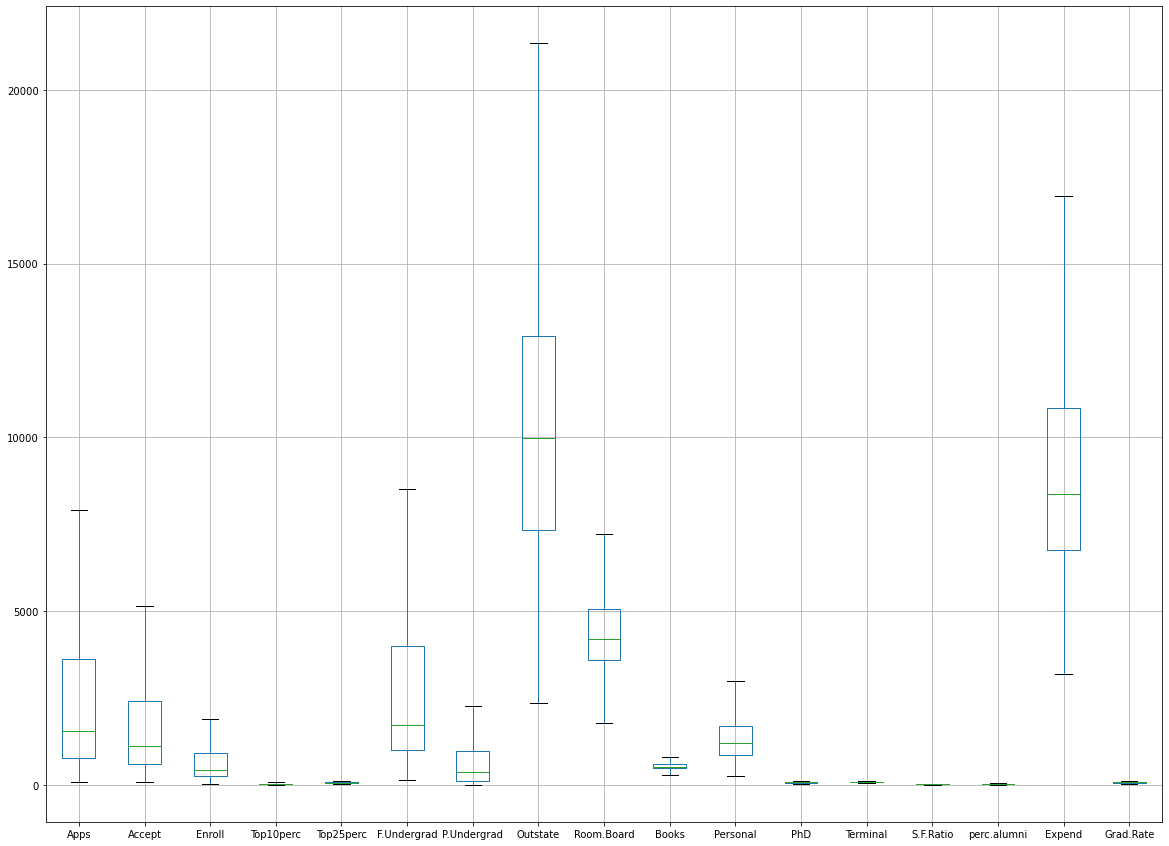

In [77]:
edu.boxplot(figsize=(20,15))

In [79]:
print("no. of rows: ",edu.shape[0], "\n""no. of columns: ",edu.shape[1])

no. of rows:  777 
no. of columns:  18


In [80]:
#Method 1 -- Scales the data. Essentially returns the z-scores of every attribute
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [82]:
#Method 2 --
from sklearn.preprocessing import MinMaxScaler

edu['Scaled_Apps'] = MinMaxScaler().fit_transform(edu[['Apps']])
edu['Scaled_Accept'] = MinMaxScaler().fit_transform(edu[['Accept']])
edu['Scaled_Enroll'] = MinMaxScaler().fit_transform(edu[['Enroll']])
edu['Scaled_Top10perc'] = MinMaxScaler().fit_transform(edu[['Top10perc']])
edu['Scaled_Top25perc'] = MinMaxScaler().fit_transform(edu[['Top25perc']])
edu['Scaled_F.Undergrad'] = MinMaxScaler().fit_transform(edu[['F.Undergrad']])
edu['Scaled_P.Undergrad'] = MinMaxScaler().fit_transform(edu[['P.Undergrad']])
edu['Scaled_Outstate'] = MinMaxScaler().fit_transform(edu[['Outstate']])
edu['Scaled_Room.Board'] = MinMaxScaler().fit_transform(edu[['Room.Board']])
edu['Scaled_Books'] = MinMaxScaler().fit_transform(edu[['Books']])
edu['Scaled_Personal'] = MinMaxScaler().fit_transform(edu[['Personal']])
edu['Scaled_PhD'] = MinMaxScaler().fit_transform(edu[['PhD']])
edu['Scaled_Terminal'] = MinMaxScaler().fit_transform(edu[['Terminal']])
edu['Scaled_S.F.Ratio'] = MinMaxScaler().fit_transform(edu[['S.F.Ratio']])
edu['Scaled_perc.alumni'] = MinMaxScaler().fit_transform(edu[['perc.alumni']])
edu['Scaled_Expend'] = MinMaxScaler().fit_transform(edu[['Expend']])
edu['Scaled_Grad.Rate'] = MinMaxScaler().fit_transform(edu[['Grad.Rate']])

In [83]:
edu_scaled = pd.DataFrame({
'Scaled_Apps': edu['Scaled_Apps'] ,
'Scaled_Accept': edu['Scaled_Accept'] ,
'Scaled_Enroll': edu['Scaled_Enroll'] ,
'Scaled_Top10perc': edu['Scaled_Top10perc'] ,
'Scaled_Top25perc': edu['Scaled_Top25perc'] ,
'Scaled_F.Undergrad': edu['Scaled_F.Undergrad'] ,
'Scaled_P.Undergrad': edu['Scaled_P.Undergrad'] ,
'Scaled_Outstate': edu['Scaled_Outstate'] ,
'Scaled_Room.Board': edu['Scaled_Room.Board'] ,
'Scaled_Books': edu['Scaled_Books'] ,
'Scaled_Personal': edu['Scaled_Personal'] ,
'Scaled_PhD': edu['Scaled_PhD'] ,
'Scaled_Terminal': edu['Scaled_Terminal'] ,
'Scaled_S.F.Ratio': edu['Scaled_S.F.Ratio'] ,
'Scaled_perc.alumni': edu['Scaled_perc.alumni'] ,
'Scaled_Expend': edu['Scaled_Expend'] ,
'Scaled_Grad.Rate': edu['Scaled_Grad.Rate'] })
edu_scaled

Scaled_Apps  Scaled_Accept  Scaled_Enroll  Scaled_Top10perc  \
0       0.202047       0.228257       0.369413          0.343750   
1       0.269354       0.364423       0.256866          0.234375   
2       0.172361       0.201692       0.162089          0.328125   
3       0.042994       0.054506       0.054927          0.921875   
4       0.014331       0.014561       0.010770          0.234375   
5       0.064747       0.080087       0.066236          0.578125   
6       0.034805       0.052735       0.036618          0.250000   
7       0.232630       0.324282       0.244480          0.562500   
8       0.122457       0.150925       0.103393          0.453125   
9       0.064107       0.083825       0.073775          0.312500   
10      0.211260       0.266234       0.235326          0.562500   
11      0.328983       0.359701       0.241788          0.671875   
12      0.140499       0.139315       0.137318          0.578125   
13      0.151759       0.198347       0.188476          0.671875   
14      0.052847       0.047422       0.065697          0.343750   
15      0.171337       0.200905       0.099623          0.125000   
16      0.540115       0.181031       0.206247          1.000000   
17      0.145234       0.164502       0.208939          0.281250   
18      0.134229       0.124360       0.154550          0.203125   
19      0.442610       0.379575       0.528271          0.359375   
20      0.080870       0.115899       0.116855          0.375000   
21      0.925400       0.903581       1.000000          0.296875   
22      0.068842       0.087367       0.099085          0.296875   
23      1.000000       1.000000       1.000000          0.359375   
24      0.080230       0.051555       0.070544          0.703125   
25      0.211516       0.326053       0.493269          0.171875   
26      0.262828       0.320346       0.245557          0.343750   
27      0.955470       1.000000       1.000000          0.375000   
28      0.074344       0.086777       0.119548          0.171875   
29      0.230070       0.312082       0.248788          0.546875   
..           ...            ...            ...               ...   
747     0.386308       0.408894       0.425417          0.031250   
748     0.074344       0.094648       0.080237          0.296875   
749     0.117083       0.156238       0.184168          0.437500   
750     0.106974       0.127509       0.095854          0.312500   
751     0.111196       0.126131       0.170167          0.640625   
752     0.172873       0.166863       0.276252          0.859375   
753     0.212028       0.256002       0.205708          0.312500   
754     0.105182       0.134396       0.095854          0.218750   
755     0.227767       0.182212       0.174475          0.687500   
756     0.204734       0.196183       0.166397          0.531250   
757     0.133077       0.168044       0.181475          0.656250   
758     0.263340       0.279418       0.251481          0.359375   
759     0.198337       0.267414       0.214863          0.218750   
760     0.201791       0.246950       0.193861          0.750000   
761     0.074472       0.093467       0.150781          0.484375   
762     0.049648       0.071429       0.103393          0.250000   
763     0.525272       0.230815       0.264405          1.000000   
764     0.011004       0.011413       0.005924          0.234375   
765     0.148177       0.185950       0.187399          0.140625   
766     0.415099       0.388627       0.681745          0.296875   
767     0.286500       0.341007       0.395261          0.359375   
768     0.009085       0.011019       0.021540          0.250000   
769     0.242866       0.328020       0.290792          0.640625   
770     0.181702       0.169815       0.128164          0.781250   
771     0.343826       0.441165       0.348411          0.750000   
772     0.270761       0.283943       0.273560          0.046875   
773     0.240307       0.341007       0.355412          0.359

In [85]:
edu_scaled.cov()

Scaled_Apps  Scaled_Accept  Scaled_Enroll  \
Scaled_Apps            0.096064       0.088750       0.085345   
Scaled_Accept          0.088750       0.089845       0.086069   
Scaled_Enroll          0.085345       0.086069       0.094258   
Scaled_Top10perc       0.024250       0.016296       0.012839   
Scaled_Top25perc       0.024586       0.017853       0.015397   
Scaled_F.Undergrad     0.085932       0.086582       0.095630   
Scaled_P.Undergrad     0.050749       0.054070       0.062045   
Scaled_Outstate        0.004288      -0.000318      -0.010119   
Scaled_Room.Board      0.011629       0.007174      -0.001465   
Scaled_Books           0.016218       0.013862       0.013747   
Scaled_Personal        0.015941       0.017186       0.023303   
Scaled_PhD             0.030383       0.027066       0.024751   
Scaled_Terminal        0.032215       0.028927       0.026028   
Scaled_S.F.Ratio       0.007413       0.010691       0.015932   
Scaled_perc.alumni    -0.006663      -0.010543      -0.014531   
Scaled_Expend          0.018583       0.011970       0.004108   
Scaled_Grad.Rate       0.008012       0.004058      -0.001224   

                    Scaled_Top10perc  Scaled_Top25perc  Scaled_F.Undergrad  \
Scaled_Apps                 0.024250          0.024586            0.085932   
Scaled_Accept               0.016296          0.017853            0.086582   
Scaled_Enroll               0.012839          0.015397            0.095630   
Scaled_Top10perc            0.059281          0.048425            0.008720   
Scaled_Top25perc            0.048425          0.047365            0.012698   
Scaled_F.Undergrad          0.008720          0.012698            0.103692   
Scaled_P.Undergrad         -0.013805         -0.006807            0.070608   
Scaled_Outstate             0.028983          0.022562           -0.015422   
Scaled_Room.Board           0.017414          0.014417           -0.003511   
Scaled_Books                0.008279          0.008187            0.014834   
Scaled_Personal            -0.006357         -0.004226            0.025913   
Scaled_PhD                  0.027989          0.025360            0.024601   
Scaled_Terminal             0.029516          0.027472            0.025810   
Scaled_S.F.Ratio           -0.017871         -0.012240            0.019771   
Scaled_perc.alumni          0.023583          0.019278           -0.019534   
Scaled_Expend               0.039481          0.030771            0.000029   
Scaled_Grad.Rate            0.020605          0.017870           -0.004540   

                    Scaled_P.Undergrad  Scaled_Outstate  Scaled_Room.Board  \
Scaled_Apps                   0.050749         0.004288           0.011629   
Scaled_Accept                 0.054070        -0.000318           0.007174   
Scaled_Enroll                 0.062045        -0.010119          -0.001465   
Scaled_Top10perc             -0.013805         0.028983           0.017414   
Scaled_Top25perc             -0.006807         0.022562           0.014417   
Scaled_F.Undergrad            0.070608        -0.015422          -0.003511   
Scaled_P.Undergrad            0.099215        -0.023626          -0.004264   
Scaled_Outstate              -0.023626         0.044839           0.027780   
Scaled_Room.Board            -0.004264         0.027780           0.040056   
Scaled_Books                  0.008552         0.000240           0.004831   
Scaled_Personal               0.024240        -0.015422          -0.009829   
Scaled_PhD                    0.008497         0.017509           0.014441   
Scaled_Terminal               0.009204         0.020900           0.018159   
Scaled_S.F.Ratio              0.022088        -0.022985          -0.014255   
Scaled_perc.alumni           -0.028069         0.025458           0.011585   
Scaled_Expend                -0.015697         0.040518           0.028679   
Scaled_Grad.Rate             -0.014318         0.020780           0.014609   

                    Scaled_Books  Scale

In [86]:
edu_scaled.corr()

Scaled_Apps  Scaled_Accept  Scaled_Enroll  \
Scaled_Apps            1.000000       0.955307       0.896883   
Scaled_Accept          0.955307       1.000000       0.935277   
Scaled_Enroll          0.896883       0.935277       1.000000   
Scaled_Top10perc       0.321342       0.223298       0.171756   
Scaled_Top25perc       0.364491       0.273681       0.230434   
Scaled_F.Undergrad     0.861002       0.897034       0.967302   
Scaled_P.Undergrad     0.519823       0.572691       0.641595   
Scaled_Outstate        0.065337      -0.005002      -0.155655   
Scaled_Room.Board      0.187475       0.119586      -0.023846   
Scaled_Books           0.236138       0.208705       0.202057   
Scaled_Personal        0.229948       0.256346       0.339348   
Scaled_PhD             0.463924       0.427341       0.381540   
Scaled_Terminal        0.434478       0.403409       0.354379   
Scaled_S.F.Ratio       0.126411       0.188506       0.274269   
Scaled_perc.alumni    -0.101158      -0.165516      -0.222723   
Scaled_Expend          0.242935       0.161808       0.054221   
Scaled_Grad.Rate       0.150803       0.078982      -0.023251   

                    Scaled_Top10perc  Scaled_Top25perc  Scaled_F.Undergrad  \
Scaled_Apps                 0.321342          0.364491            0.861002   
Scaled_Accept               0.223298          0.273681            0.897034   
Scaled_Enroll               0.171756          0.230434            0.967302   
Scaled_Top10perc            1.000000          0.913875            0.111215   
Scaled_Top25perc            0.913875          1.000000            0.181196   
Scaled_F.Undergrad          0.111215          0.181196            1.000000   
Scaled_P.Undergrad         -0.180009         -0.099295            0.696130   
Scaled_Outstate             0.562160          0.489569           -0.226166   
Scaled_Room.Board           0.357366          0.330987           -0.054476   
Scaled_Books                0.153452          0.169761            0.207879   
Scaled_Personal            -0.116730         -0.086810            0.359783   
Scaled_PhD                  0.544048          0.551461            0.361564   
Scaled_Terminal             0.506748          0.527654            0.335054   
Scaled_S.F.Ratio           -0.387926         -0.297233            0.324504   
Scaled_perc.alumni          0.455797          0.416832           -0.285457   
Scaled_Expend               0.657039          0.572905            0.000371   
Scaled_Grad.Rate            0.493670          0.478985           -0.082239   

                    Scaled_P.Undergrad  Scaled_Outstate  Scaled_Room.Board  \
Scaled_Apps                   0.519823         0.065337           0.187475   
Scaled_Accept                 0.572691        -0.005002           0.119586   
Scaled_Enroll                 0.641595        -0.155655          -0.023846   
Scaled_Top10perc             -0.180009         0.562160           0.357366   
Scaled_Top25perc             -0.099295         0.489569           0.330987   
Scaled_F.Undergrad            0.696130        -0.226166          -0.054476   
Scaled_P.Undergrad            1.000000        -0.354216          -0.067638   
Scaled_Outstate              -0.354216         1.000000           0.655489   
Scaled_Room.Board            -0.067638         0.655489           1.000000   
Scaled_Books                  0.122529         0.005110           0.108924   
Scaled_Personal               0.344053        -0.325609          -0.219554   
Scaled_PhD                    0.127663         0.391321           0.341469   
Scaled_Terminal               0.122152         0.412579           0.379270   
Scaled_S.F.Ratio              0.370607        -0.573683          -0.376430   
Scaled_perc.alumni           -0.419334         0.565736           0.272393   
Scaled_Expend                -0.201929         0.775328           0.580622   
Scaled_Grad.Rate             -0.265158         0.572458           0.425790   

                    Scaled_Books  Scale

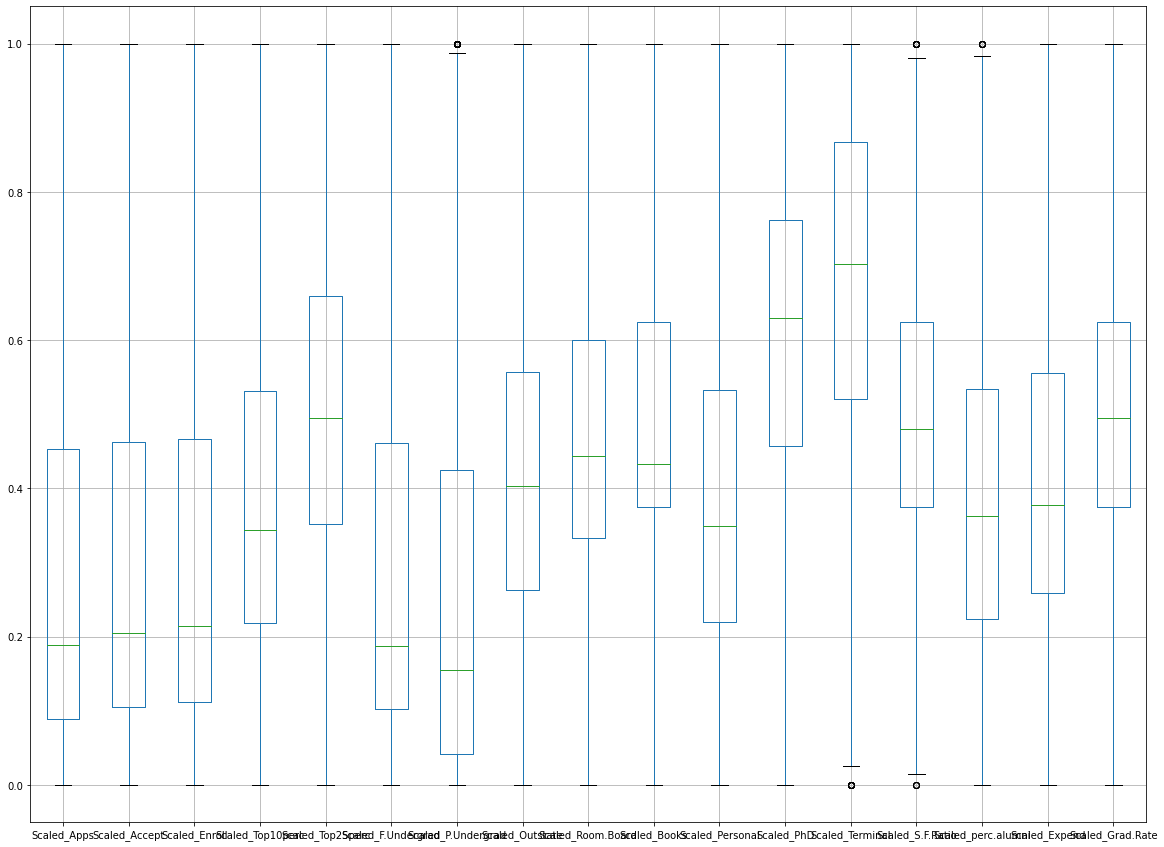

In [87]:
edu_scaled.boxplot(figsize=(20,15))

In [112]:
edu_scaled.head()

Scaled_Apps  Scaled_Accept  Scaled_Enroll  Scaled_Top10perc  \
0     0.202047       0.228257       0.369413          0.343750   
1     0.269354       0.364423       0.256866          0.234375   
2     0.172361       0.201692       0.162089          0.328125   
3     0.042994       0.054506       0.054927          0.921875   
4     0.014331       0.014561       0.010770          0.234375   

   Scaled_Top25perc  Scaled_F.Undergrad  Scaled_P.Undergrad  Scaled_Outstate  \
0          0.472527            0.327470            0.235708         0.268527   
1          0.219780            0.303381            0.539138         0.523364   
2          0.450549            0.106970            0.043096         0.469133   
3          0.879121            0.044243            0.027265         0.559168   
4          0.384615            0.013118            0.381706         0.274845   

   Scaled_Room.Board  Scaled_Books  Scaled_Personal  Scaled_PhD  \
0           0.278925      0.336538         0.715596    0.562914   
1           0.856959      0.913462         0.458716    0.019868   
2           0.361501      0.240385         0.335780    0.337748   
3           0.673456      0.336538         0.229358    0.854305   
4           0.429397      1.000000         0.458716    0.642384   

   Scaled_Terminal  Scaled_S.F.Ratio  Scaled_perc.alumni  Scaled_Expend  \
0         0.636364             0.705            0.206897       0.280109   
1         0.000000             0.410            0.275862       0.533406   
2         0.438017             0.445            0.517241       0.403197   
3         0.950413             0.185            0.637931       1.000000   
4         0.537190             0.395            0.034483       0.562107   

   Scaled_Grad.Rate  
0             0.445  
1             0.405  
2             0.385  
3             0.435  
4             0.000

In [90]:
#step-1
#creating cov matrix for identifying Principal component:-
cov_matrix = np.cov(edu_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 9.60639283e-02  8.87503219e-02  8.53445271e-02  2.42496912e-02
   2.45864339e-02  8.59322960e-02  5.07486463e-02  4.28811812e-03
   1.16294648e-02  1.62183446e-02  1.59411839e-02  3.03826478e-02
   3.22146009e-02  7.41328107e-03 -6.66276896e-03  1.85825074e-02
   8.01247212e-03]
 [ 8.87503219e-02  8.98450056e-02  8.60690305e-02  1.62963720e-02
   1.78533374e-02  8.65820922e-02  5.40699528e-02 -3.17501496e-04
   7.17403628e-03  1.38624902e-02  1.71863961e-02  2.70657301e-02
   2.89266317e-02  1.06909701e-02 -1.05429348e-02  1.19696435e-02
   4.05836643e-03]
 [ 8.53445271e-02  8.60690305e-02  9.42582039e-02  1.28389587e-02
   1.53969357e-02  9.56299625e-02  6.20453597e-02 -1.01193553e-02
  -1.46521593e-03  1.37465710e-02  2.33032439e-02  2.47512877e-02
   2.60275153e-02  1.59324092e-02 -1.45311455e-02  4.10827406e-03
  -1.22370619e-03]
 [ 2.42496912e-02  1.62963720e-02  1.28389587e-02  5.92811330e-02
   4.84254612e-02  8.71952312e-03 -1.38051376e-02  2.89832290e-

In [91]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 4.37712296e-01 -6.91655847e-02  9.86754390e-02  1.44069481e-01
  -2.42235395e-01  1.04439437e-01 -6.63768704e-02 -2.93002210e-02
   9.46359240e-02 -5.60354443e-03 -1.99945610e-01  7.30049702e-02
  -5.11371433e-01 -5.65201845e-01  5.68089988e-02 -2.15034996e-01
  -1.16467700e-01]
 [ 4.29304229e-01 -8.02995413e-03  1.33207948e-01  1.14242537e-01
  -2.09948708e-01  1.12114125e-01 -1.25669852e-01 -4.65420463e-03
   3.06899055e-02 -1.81823706e-03  4.34365932e-01  3.05474775e-03
  -3.33955269e-01  6.36051011e-01 -3.81035874e-02  7.17407193e-02
  -7.82163929e-03]
 [ 4.43758174e-01  6.73272398e-02  6.46596827e-02  1.73518128e-01
  -6.13383277e-02 -6.63333930e-04 -8.47685389e-02  3.86767760e-02
  -1.12323265e-01 -2.40583654e-02 -7.13219873e-01  1.37983947e-02
   3.38226871e-01  2.66554019e-01 -1.13958193e-01  1.56120698e-01
   8.32764926e-02]
 [ 9.75222020e-02 -3.77131032e-01 -1.56493566e-01  2.96006364e-01
   1.50387831e-01 -2.69406091e-01  3.32891754e-01 -2.19734939e-01
 

In [92]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 42.57427604  68.40537055  73.71339671  78.63000314  83.12579642
  86.54639554  89.773884    92.21739719  94.45156979  95.7851308
  96.84251659  97.77008847  98.45558772  99.07998907  99.46157036
  99.79583225 100.        ]


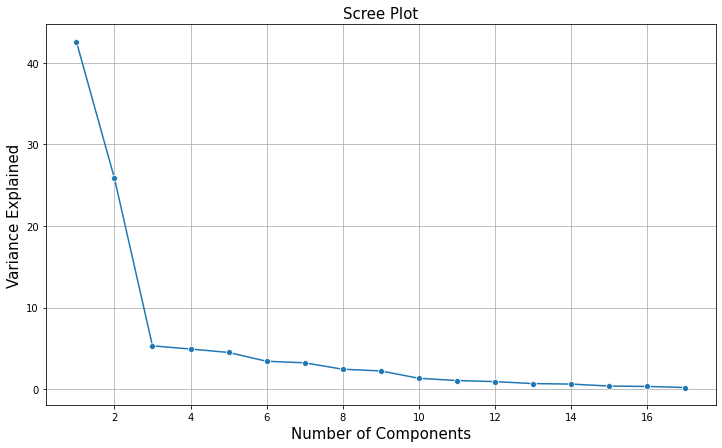

In [98]:
# Step 3 View Scree Plot to identify the number of components to be built
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [101]:
# Step 4 Apply PCA for the number of decided components to get the loadings and component output

# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA
# NOTE - we are generating only 8 PCA dimensions (dimensionality reduction from 17 to 7)
pca = PCA(n_components=7, random_state=123)
df_pca = pca.fit_transform(edu_scaled)
df_pca.transpose() # Component output

array([[-0.08865656, -0.17156664, -0.52455088, ..., -0.09880037,
         0.79822474,  0.17701757],
       [-0.37583886, -0.39550487, -0.0801813 , ..., -0.03814571,
         1.32496654, -0.32789364],
       [ 0.09813472,  0.26120061, -0.1707002 , ...,  0.06835045,
         0.2616318 , -0.15536264],
       ...,
       [-0.21468356,  0.92085046,  0.15017712, ...,  0.01145245,
         0.28843678, -0.25480842],
       [ 0.16582017,  0.00778554,  0.15660359, ..., -0.18553093,
         0.20073923,  0.08578321],
       [-0.18019637,  0.32018335, -0.08795897, ...,  0.10340004,
        -0.15866698,  0.42638073]])

In [102]:
pca.components_

array([[ 4.37712296e-01,  4.29304229e-01,  4.43758174e-01,
         9.75222020e-02,  1.07449930e-01,  4.60619821e-01,
         3.23799620e-01, -1.76643015e-02,  3.03534281e-02,
         8.82769536e-02,  1.13123873e-01,  1.60382927e-01,
         1.73041197e-01,  6.32889611e-02, -6.19120065e-02,
         6.07953059e-02,  9.37226817e-03],
       [ 6.91655847e-02,  8.02995413e-03, -6.73272398e-02,
         3.77131032e-01,  3.10873776e-01, -1.15654549e-01,
        -2.68902969e-01,  3.49075100e-01,  2.35857271e-01,
         3.58691428e-02, -1.50330670e-01,  2.34601058e-01,
         2.70248987e-01, -2.29451174e-01,  2.77467003e-01,
         4.02858146e-01,  2.11407105e-01],
       [-9.86754390e-02, -1.33207948e-01, -6.46596827e-02,
         1.56493566e-01,  1.34978356e-01, -4.17163146e-02,
        -4.32898611e-02, -9.93815467e-02, -8.15476346e-02,
         7.17824204e-01,  5.85151514e-01, -4.79765784e-03,
         1.55907082e-03, -9.22273228e-02, -9.10106949e-02,
         9.51887519e-02, -1.4

In [103]:
pca.explained_variance_ratio_

array([0.42574276, 0.25831095, 0.05308026, 0.04916606, 0.04495793,
       0.03420599, 0.03227488])

In [105]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(edu_scaled))
df_pca_loading.shape

(7, 17)

In [106]:
df_pca_loading.head(7)

Scaled_Apps  Scaled_Accept  Scaled_Enroll  Scaled_Top10perc  \
0     0.437712       0.429304       0.443758          0.097522   
1     0.069166       0.008030      -0.067327          0.377131   
2    -0.098675      -0.133208      -0.064660          0.156494   
3    -0.144069      -0.114243      -0.173518         -0.296006   
4     0.242235       0.209949       0.061338         -0.150388   
5    -0.104439      -0.112114       0.000663          0.269406   
6    -0.066377      -0.125670      -0.084769          0.332892   

   Scaled_Top25perc  Scaled_F.Undergrad  Scaled_P.Undergrad  Scaled_Outstate  \
0          0.107450            0.460620            0.323800        -0.017664   
1          0.310874           -0.115655           -0.268903         0.349075   
2          0.134978           -0.041716           -0.043290        -0.099382   
3         -0.271762           -0.104190            0.581859         0.179147   
4         -0.197744           -0.005480           -0.103462         0.227509   
5          0.212344            0.006834            0.348524         0.027902   
6          0.362929           -0.040271            0.519270        -0.059872   

   Scaled_Room.Board  Scaled_Books  Scaled_Personal  Scaled_PhD  \
0           0.030353      0.088277         0.113124    0.160383   
1           0.235857      0.035869        -0.150331    0.234601   
2          -0.081548      0.717824         0.585152   -0.004798   
3           0.416545      0.078374        -0.006866    0.178213   
4           0.290591      0.166208        -0.022931   -0.470515   
5          -0.117631     -0.568784         0.456321   -0.135596   
6           0.068807      0.278628        -0.432040   -0.205709   

   Scaled_Terminal  Scaled_S.F.Ratio  Scaled_perc.alumni  Scaled_Expend  \
0         0.173041          0.063289           -0.061912       0.060795   
1         0.270249         -0.229451            0.277467       0.402858   
2         0.001559         -0.092227           -0.091011       0.095189   
3         0.281054         -0.129649           -0.149848       0.227877   
4        -0.530730         -0.295846           -0.038610       0.238197   
5        -0.214689         -0.294466            0.027053       0.181769   
6        -0.258342          0.156586            0.048846      -0.163292   

   Scaled_Grad.Rate  
0          0.009372  
1          0.211407  
2         -0.148117  
3         -0.107045  
4          0.088656  
5         -0.077572  
6          0.153558

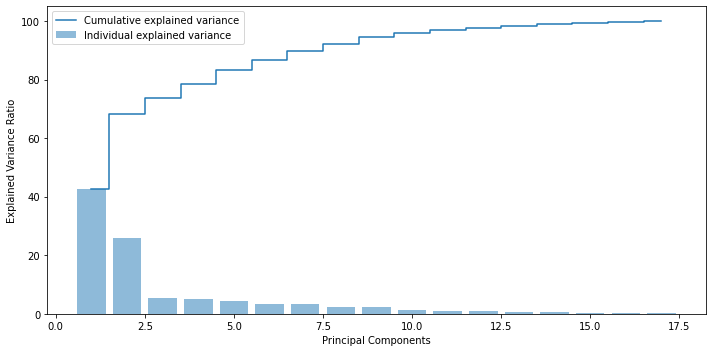

In [107]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [109]:
pca = PCA(n_components=7)
data_reduced = pca.fit_transform(edu_scaled)
data_reduced.transpose()

array([[-0.08865656, -0.17156664, -0.52455088, ..., -0.09880037,
         0.79822474,  0.17701757],
       [-0.37583886, -0.39550487, -0.0801813 , ..., -0.03814571,
         1.32496654, -0.32789364],
       [ 0.09813472,  0.26120061, -0.1707002 , ...,  0.06835045,
         0.2616318 , -0.15536264],
       ...,
       [-0.21468356,  0.92085046,  0.15017712, ...,  0.01145245,
         0.28843678, -0.25480842],
       [ 0.16582017,  0.00778554,  0.15660359, ..., -0.18553093,
         0.20073923,  0.08578321],
       [-0.18019637,  0.32018335, -0.08795897, ...,  0.10340004,
        -0.15866698,  0.42638073]])

In [115]:
#Find correlation between components and features
edu_comp = pd.DataFrame(pca.components_,columns=list(edu_scaled))
edu_comp.head()

Scaled_Apps  Scaled_Accept  Scaled_Enroll  Scaled_Top10perc  \
0     0.437712       0.429304       0.443758          0.097522   
1     0.069166       0.008030      -0.067327          0.377131   
2    -0.098675      -0.133208      -0.064660          0.156494   
3    -0.144069      -0.114243      -0.173518         -0.296006   
4     0.242235       0.209949       0.061338         -0.150388   

   Scaled_Top25perc  Scaled_F.Undergrad  Scaled_P.Undergrad  Scaled_Outstate  \
0          0.107450            0.460620            0.323800        -0.017664   
1          0.310874           -0.115655           -0.268903         0.349075   
2          0.134978           -0.041716           -0.043290        -0.099382   
3         -0.271762           -0.104190            0.581859         0.179147   
4         -0.197744           -0.005480           -0.103462         0.227509   

   Scaled_Room.Board  Scaled_Books  Scaled_Personal  Scaled_PhD  \
0           0.030353      0.088277         0.113124    0.160383   
1           0.235857      0.035869        -0.150331    0.234601   
2          -0.081548      0.717824         0.585152   -0.004798   
3           0.416545      0.078374        -0.006866    0.178213   
4           0.290591      0.166208        -0.022931   -0.470515   

   Scaled_Terminal  Scaled_S.F.Ratio  Scaled_perc.alumni  Scaled_Expend  \
0         0.173041          0.063289           -0.061912       0.060795   
1         0.270249         -0.229451            0.277467       0.402858   
2         0.001559         -0.092227           -0.091011       0.095189   
3         0.281054         -0.129649           -0.149848       0.227877   
4        -0.530730         -0.295846           -0.038610       0.238197   

   Scaled_Grad.Rate  
0          0.009372  
1          0.211407  
2         -0.148117  
3         -0.107045  
4          0.088656